Adding library imports 

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os
import glob
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


Reading the initial strawberry files. Matplotlib's default color scheme BGR, so the initial reading
(as shown here) is reading the jpg color code's in reverse order. The image should be displayed as follows, but the output is incorrect.   

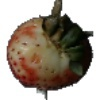



Here the image is updated to the color colorscheme using cvtColor

In [149]:
# Displaying images with updated RBG color scheme 
#colorFixImg = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
#plt.imshow(colorFixImg)


In [162]:
# import shutil
path = '/Users/Bobby/Fall2020/Artificial Intelligence/Semester Project/fruits-360/*/*/*'
files = []
[files.extend(glob.glob(path + '*.jpg'))]

# shuffle pitcures
random.shuffle(files)


In [163]:
# label the strawberry images
IMG_SIZE = 100
labels = []
color_images = []
grayscale_images = []
strawCount = 0
image_count = 0
#files = files[:200]
print('Length of files:', len(files))
for file in files:
    if 'Strawberry' in file or 'strawberry' in file:
        labels.append(1)
        strawCount += 1
    else: labels.append(0)    
    # Color
    color_image = cv2.imread(os.path.join(path, file))
    color_image = cv2.resize(color_image, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
    # Grayscale
    #grayscale_image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
    #grayscale_image = cv2.resize(grayscale_image, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
    color_images.append(color_image)
    #grayscale_images.append(grayscale_image)
    #plt.imshow(images[0], cmap = "gray")

c_images = np.array(color_images)
#g_images = np.array(grayscale_images)
labels = np.array(labels)
labels.resize(len(labels), 1)
print('Number of Strawberry Images:', strawCount)
print('Number of Images:', len(c_images))
print('Shape of Color Images:', c_images.shape)
#print('Shape of Grayscale Images:', g_images.shape)
print('Shape of Labels:', labels.shape)
#plt.imshow(images[0])


Length of files: 90380
Number of Strawberry Images: 1640
Number of Images: 90380
Shape of Color Images: (90380, 100, 100, 3)
Shape of Labels: (90380, 1)


In [164]:
# train-test split
from sklearn.model_selection import train_test_split
from skimage.feature import hog
X_trainc, X_testc, y_trainc, y_testc = train_test_split(c_images, labels, test_size = 0.2, random_state = 0)
#X_traing, X_testg, y_traing, y_testg = train_test_split(g_images, labels, test_size = 0.2, random_state = 0)

print('X_train Color shape:', X_trainc.shape) 

X_trainc = X_trainc.astype('float32')
X_testc = X_testc.astype('float32')
X_trainc /= 255
X_testc /= 255
'''
X_traing = X_traing.astype('float32')
X_testg = X_testg.astype('float32')
X_traing /= 255
X_testg /= 255
'''
X_traing = np.array(X_traing).reshape(len(X_traing), IMG_SIZE, IMG_SIZE, 1)
#X_testg = np.array(X_testg).reshape(len(X_testg), IMG_SIZE, IMG_SIZE, 1)
#print('X_train Grayscale shape:', X_traing.shape) 

X_train Color shape: (72304, 100, 100, 3)


In [165]:
def plot_train_and_val(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('CNN Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('CNN Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


In [167]:
# Convolutional Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K 


def CNN_model(epochs_, three_layers, X_train, X_test, y_train, y_test):
    X_train = tf.convert_to_tensor(X_train[:,:,:,:3])
    X_test = tf.convert_to_tensor(X_test[:,:,:,:3])
    cnn_model = Sequential()
    cnn_model.add(Conv2D(16, (3,3), input_shape = X_train.shape[1:]))
    cnn_model.add(Activation('relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2,2)))

    # For our second CNN model
    if three_layers:
        cnn_model.add(Conv2D(32, (3,3)))
        cnn_model.add(Activation('relu'))
        cnn_model.add(MaxPooling2D(pool_size = (2,2)))
        
        cnn_model.add(Conv2D(64, (3,3)))
        cnn_model.add(Activation('relu'))
        cnn_model.add(MaxPooling2D(pool_size = (2,2)))
        
    # Flatten from 2D to 1D
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64))

    # Output Layer
    cnn_model.add(Dense(1))
    cnn_model.add(Activation('sigmoid'))

    cnn_model.compile(loss ='binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    history = model.fit(X_train, y_train, batch_size = 32, epochs = epochs_, validation_data = (X_test, y_test))
    plot_train_and_val(history)
    

# CNN with one Convolutional layer Color
print('CNN Model 1')
CNN_model(7, False, X_trainc, X_testc, y_trainc, y_testc)
print('\n')

# CNN with two Convolutional layer Color
print('CNN Model 2')
CNN_model(7, True,  X_trainc, X_testc, y_trainc, y_testc)
print('\n')
'''
# CNN with one Convolutional layer Grayscale
print('CNN Model 3')
CNN_model(2, False, X_traing, X_testg, y_traing, y_testg)
print('\n')

# CNN with two Convolutional layer Grayscale
print('CNN Model 4')
CNN_model(2, True, X_traing, X_testg, y_traing, y_testg)
print('\n')
'''




CNN Model 1
Epoch 1/7
   3/2260 [..............................] - ETA: 4:41 - loss: 2.9285e-11 - accuracy: 1.0000

KeyboardInterrupt: 